In [1]:
import sys 
import sys 
from keyvars import ufiles_path
sys.path.append(ufiles_path)

import uvars
import uviz
import uprocessing as up 
import utransform as ut 
import uerrortab as errort
import os 
import pandas as pd 
import pandas.plotting as pd_plot
import numpy as np 
from pprint import  pprint

parqts = uvars.parqts
df = pd.read_parquet(parqts[1])

In [3]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import matplotlib.pyplot as plt 
from subprocess import check_call
import geostatspy.GSLIB as GSLIB
cmap = plt.cm.inferno  

In [4]:
df.head(12)

,x,y,cop,edem,pband,s1,tdemx,wc,wc_ffth,wc_gau,wc_sobelm,wc_sobelh,wc_sobelv
0,-63.000000,-0.483556,51.662418,51.249901,34.285534,-7.934625,45.090183,10.0,27.539992,10.0,0.0,0.0,0.0
1,-62.999888,-0.483556,52.067356,51.564186,34.355370,-7.881948,44.067894,10.0,25.123527,10.0,0.0,0.0,0.0
2,-62.999777,-0.483556,52.396496,51.968712,34.632790,-7.805929,44.640427,10.0,22.747256,10.0,0.0,0.0,0.0
3,-62.999665,-0.483556,52.542191,52.327309,34.950935,-7.758332,45.728882,10.0,20.428785,10.0,0.0,0.0,0.0
4,-62.999554,-0.483556,52.421185,52.528709,35.227257,-7.772036,46.259583,10.0,18.233940,10.0,0.0,0.0,0.0
5,-62.999442,-0.483556,52.139835,52.474342,35.334469,-7.802980,46.802326,10.0,16.159088,10.0,0.0,0.0,0.0
6,-62.999331,-0.483556,51.901108,52.214081,35.136692,-7.793702,47.081886,10.0,14.246160,10.0,0.0,0.0,0.0
7,-62.999219,-0.483556,51.787968,51.946251,34.755764,-7.748134,47.069679,10.0,12.552049,10.0,0.0,0.0,0.0
8,-62.999108,-0.483556,51.648727,51.811764,34.493393,-7.716868,47.098801,10.0,11.159226,10.0,0.0,0.0,0.0
9,-62.998996,-0.483556,51.327785,51.696087,34.479065,-7.740507,46.679794,10.0,10.167785,10.0,0.0,0.0,0.0


In [6]:
dfcols = ['cop', 'edem', 'pband', 's1', 's1a','tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']

fcols = ['cop', 'edem','s1', 's1a','wc', 'wc_ffth','wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcolx = 'pband' #'tdemx', 

In [7]:
df = df[dfcols]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cop,65536.0,42.360731,8.608852,25.381269,36.275472,43.432117,49.847439,57.758488
edem,65536.0,42.336092,8.597831,24.237734,36.247367,43.394871,49.826604,57.752518
pband,65536.0,31.020042,2.789703,27.165571,28.724078,29.616702,33.991473,37.919109
s1,65536.0,-8.085797,1.044923,-16.553356,-8.331324,-7.949359,-7.590429,-4.531119
s1a,65536.0,8.085797,1.044923,4.531119,7.590429,7.949359,8.331324,16.553356
tdemx,65536.0,36.893582,8.748812,13.013600,30.922582,38.026159,44.299040,55.514832
wc,65536.0,19.173584,24.158514,10.000000,10.000000,10.000000,10.000000,90.000000
wc_ffth,65536.0,19.173584,17.490760,9.904944,9.999958,10.003173,19.319900,90.108572
wc_gau,65536.0,19.173584,22.621426,10.000000,10.000000,10.000000,10.207663,90.000000
wc_sobelm,65536.0,16.810764,58.954941,0.000000,0.000000,0.000000,0.000000,357.770874


In [8]:
trainx,validx,trainy,validy = train_test_split(df[fcols], df[tcolx], random_state=42)

In [9]:
rf = RandomForestRegressor()
rf.fit(trainx, trainy)

RandomForestRegressor()

FIGS/RF/error_model_eval_pband_train.csv
'R2:0.986 RMSE:0.330 ME:0.225 MAD:0.143 LE90:0.543 EVS:0.986'


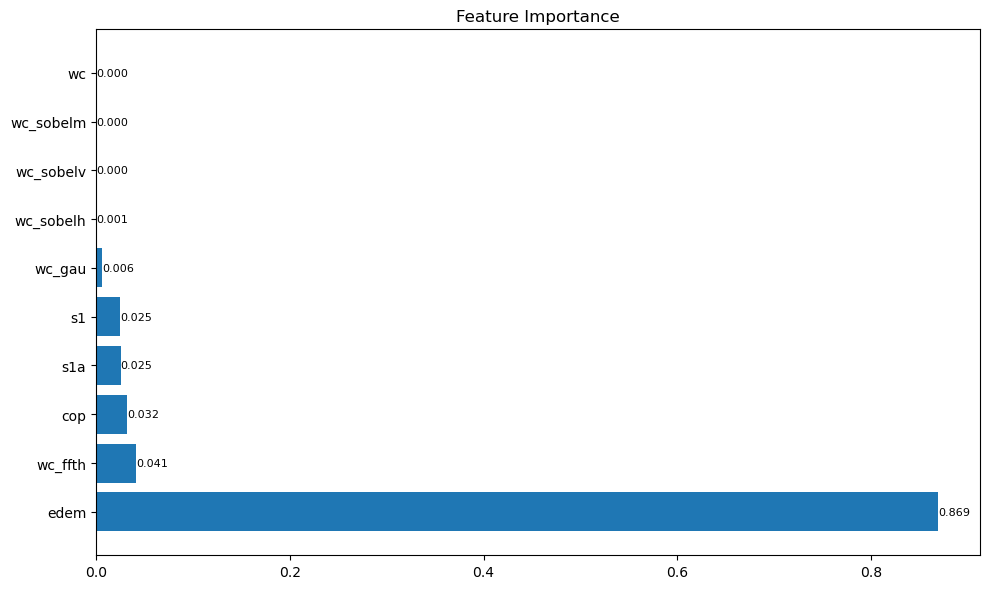

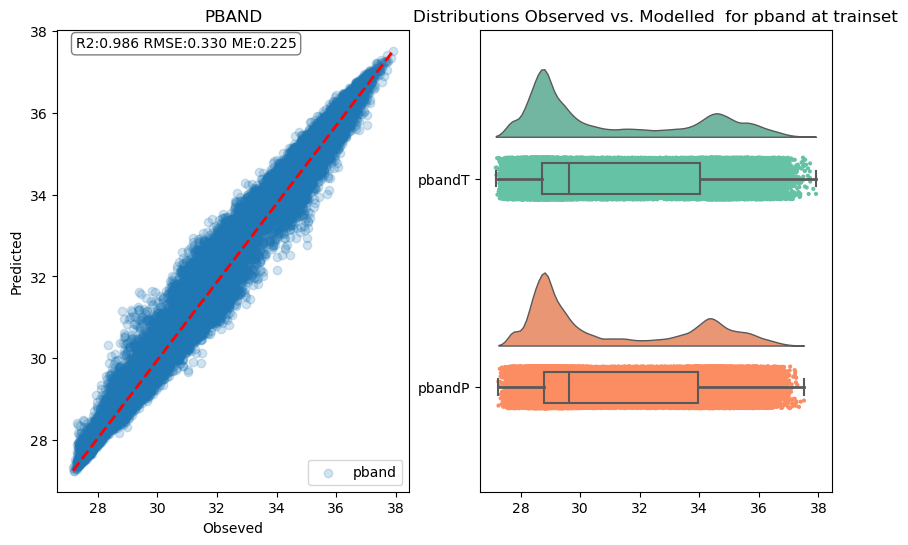

FIGS/RF/error_model_eval_pband_valid.csv
'R2:0.898 RMSE:0.887 ME:0.611 MAD:0.392 LE90:1.470 EVS:0.898'


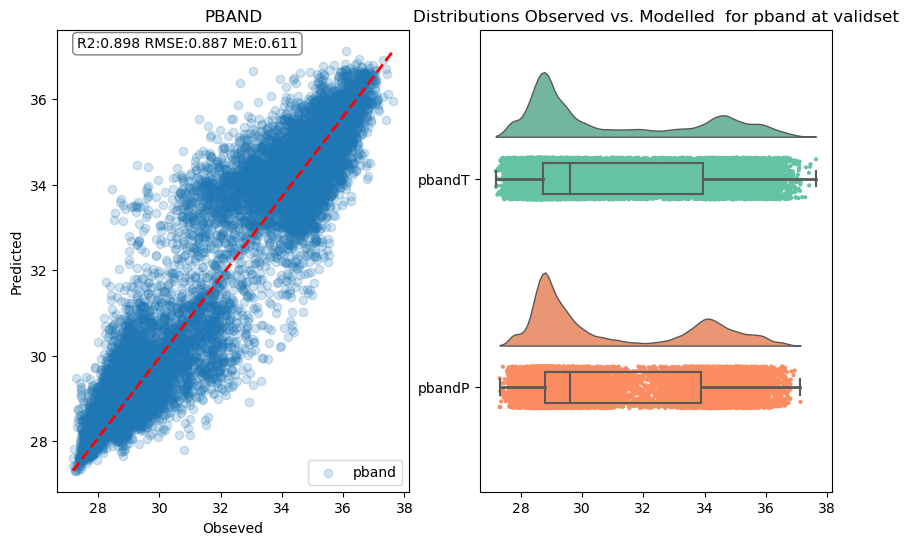

In [10]:
algo = 'RF' # join with modelname
dir_figs = f'FIGS/{algo}'
os.makedirs(dir_figs, exist_ok=True)
plotname = "Distributions Observed vs. Modelled "
fimp_png = os.path.join(dir_figs, f'FIMP_{algo}.png')
dp_figsise = (10,6)
evalsets_name = ['train', 'valid']#'test
evalsets_data = [[trainx,trainy], [validx,validy]]
uviz.check_model_viz(dir_figs, rf, fcols, dp_figsise, fimp_png,
                    evalsets_data,evalsets_name,tcolx, plotname)

FIGS/GBR/error_model_eval_pband_train.csv
'R2:0.885 RMSE:0.947 ME:0.698 MAD:0.528 LE90:1.529 EVS:0.885'


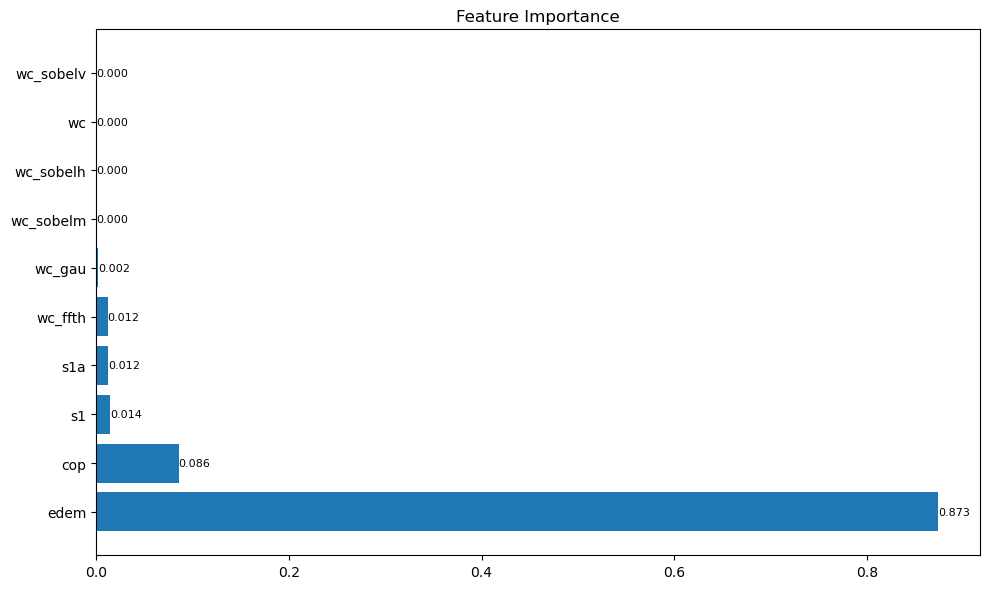

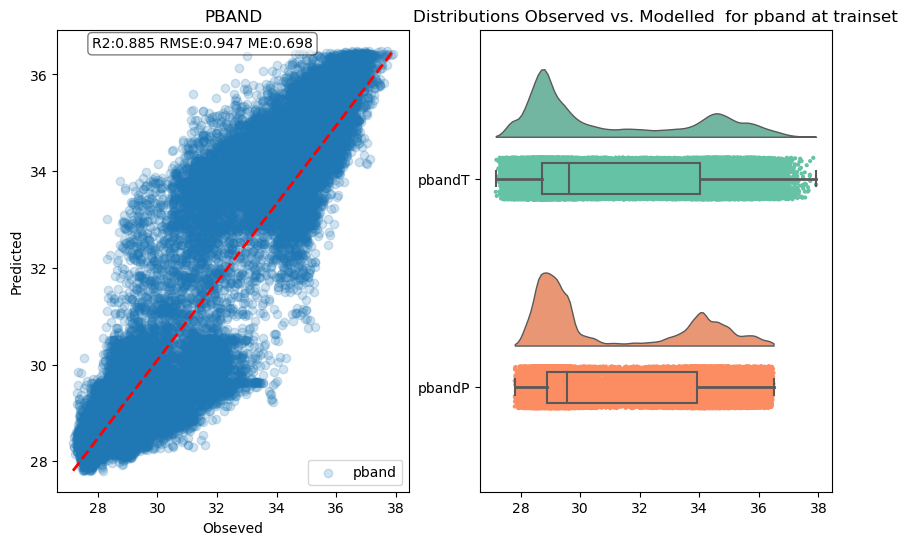

FIGS/GBR/error_model_eval_pband_valid.csv
'R2:0.881 RMSE:0.961 ME:0.706 MAD:0.530 LE90:1.530 EVS:0.881'


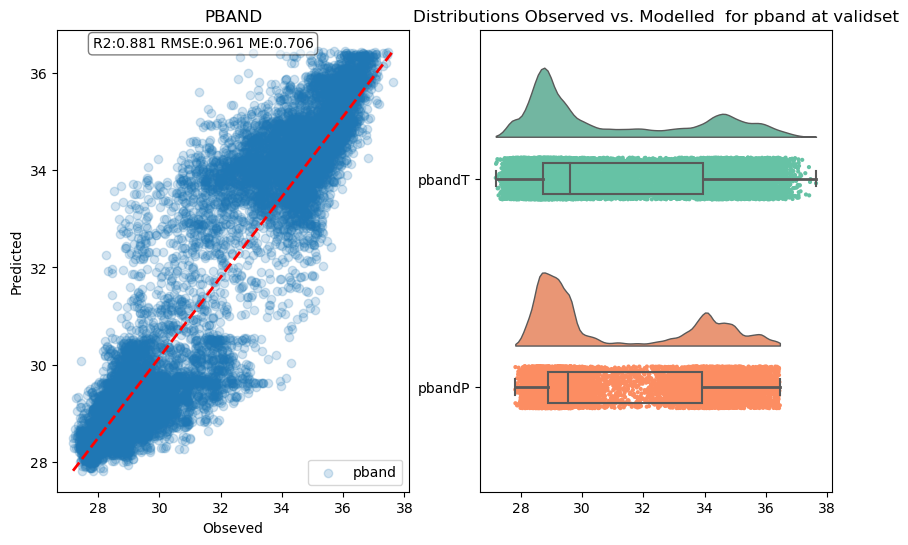

In [11]:
gbr = GradientBoostingRegressor()
gbr.fit(trainx, trainy)
algo = 'GBR' # join with modelname
dir_figs = f'FIGS/{algo}'
os.makedirs(dir_figs, exist_ok=True)
plotname = "Distributions Observed vs. Modelled "
fimp_png = os.path.join(dir_figs, f'FIMP_{algo}.png')
dp_figsise = (10,6)
evalsets_name = ['train', 'valid']#'test
evalsets_data = [[trainx,trainy], [validx,validy]]
uviz.check_model_viz(dir_figs, gbr, fcols, dp_figsise, fimp_png,
                    evalsets_data,evalsets_name,tcolx, plotname)

FIGS/IsotonicRegression/error_model_eval_pband_train.csv
'R2:0.885 RMSE:0.947 ME:0.698 MAD:0.528 LE90:1.529 EVS:0.885'


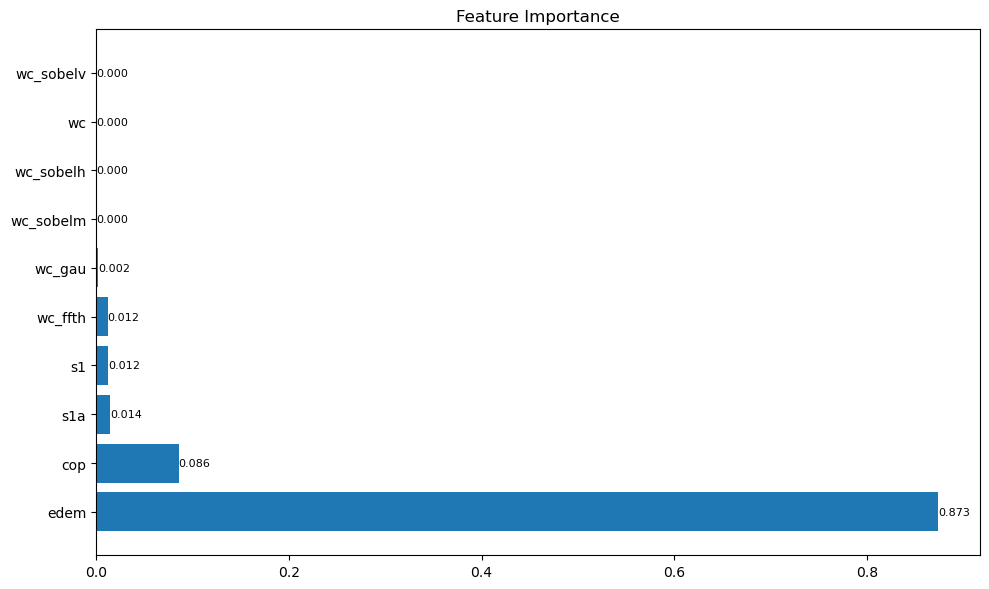

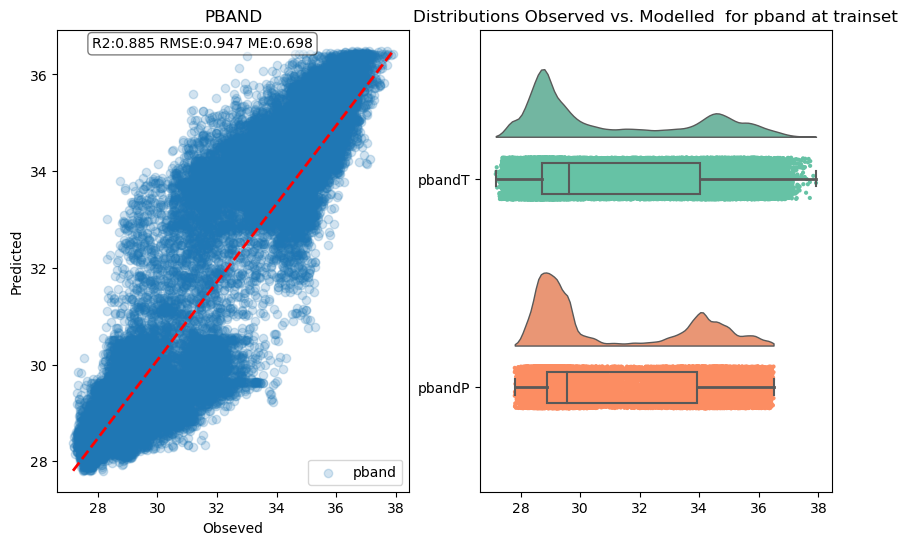

FIGS/IsotonicRegression/error_model_eval_pband_valid.csv
'R2:0.881 RMSE:0.961 ME:0.706 MAD:0.530 LE90:1.530 EVS:0.881'


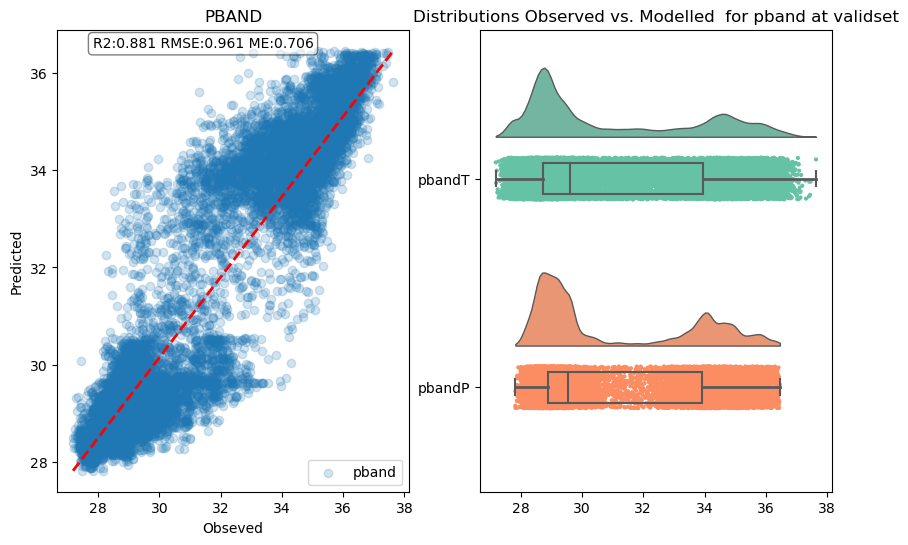

In [14]:
from sklearn.isotonic import IsotonicRegression
ir = GradientBoostingRegressor()
ir.fit(trainx, trainy)
algo = 'IsotonicRegression' # join with modelname
dir_figs = f'FIGS/{algo}'
os.makedirs(dir_figs, exist_ok=True)
plotname = "Distributions Observed vs. Modelled "
fimp_png = os.path.join(dir_figs, f'FIMP_{algo}.png')
dp_figsise = (10,6)
evalsets_name = ['train', 'valid']#'test
evalsets_data = [[trainx,trainy], [validx,validy]]
uviz.check_model_viz(dir_figs, ir, fcols, dp_figsise, fimp_png,
                    evalsets_data,evalsets_name,tcolx, plotname)

In [12]:
# another eval like wx: cross -validation 
# add wc_ffth for categorical transformation and get rid of the rest
# join this two plots togetter : def model eval plots [x]
# feature importance and plot  : def the above + feature importance 
# hpo using bayesian 
# log into wandb 
# close this chapter and move on: skipik